**BASES DE DATOS RELACIONALES**

Datos Abiertos Argentina --> Ciencia y Tecnología --> Soporte de plataformas --> CSV: Consultas realizadas al Centro de Soporte

El área de soporte es la encargada de recibir, gestionar y dar respuesta a las incidencias reportadas por las y los usuarios de la administración pública, ciudadanía y autoridades de registro, referido a los proyectos Gestión Documental Electrónica, Trámites a Distancia y Firma Digital Remota.


Soy un estudiante en análisis de datos, no tengo conocimientos de informática, necesito leer un archivo del tipo csv en google colaboratory, ya tengo anierto google colaboratory y descargado el archivo csv en mi carpeta de descargas. como podria leerlo?

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving consultas-realizadas-centro-soporte.csv to consultas-realizadas-centro-soporte (1).csv


In [ ]:
!pip install pandas


In [ ]:
import pandas as pd

# Cambia 'nombre_del_archivo.csv' al nombre real de tu archivo
nombre_archivo = 'consultas-realizadas-centro-soporte.csv'

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(nombre_archivo)

# Mostrar las primeras filas del DataFrame
print(df.head())


        fecha plataforma  consultas_recibidas  consultas_respondidas
0  2022-01-01        TAD                 2078                   2089
1  2022-01-01        GDE                 1724                   2539
2  2022-01-01       PFDR                  155                    101
3  2022-02-01        TAD                 2347                   1814
4  2022-02-01        GDE                 1451                   1327


dentro de mi dataframe tengo una columna que especifica el tipo de plataforma denominada "plataforma", luego otra columna llamada consultas_recibidas, cada aparicion en plataforma refiere a un dato mensual, como hago para totalizar las consultas_recibidas por cada plataforma?

In [ ]:


# Suponiendo que la columna de plataforma se llama 'plataforma' y la de consultas 'consultas_recibidas'
# Asegúrate de tener las columnas en formato adecuado, si no, conviértelas a datetime o numérico según sea necesario

# Agrupar por plataforma y sumar las consultas recibidas
total_consultas_por_plataforma = df.groupby('plataforma')['consultas_recibidas'].sum().reset_index()

# Mostrar el resultado
print(total_consultas_por_plataforma)




  plataforma  consultas_recibidas
0        GDE                31351
1       PFDR                 9216
2        TAD                46876


de igual forma quiero conocer las consultas_respondidas

In [ ]:
import pandas as pd

# Suponiendo que la columna de plataforma se llama 'plataforma' y las de consultas recibidas y respondidas son 'consultas_recibidas' y 'consultas_respondidas'
# Asegúrate de tener las columnas en formato adecuado, si no, conviértelas a datetime o numérico según sea necesario

# Agrupar por plataforma y sumar las consultas recibidas y respondidas
total_consultas_por_plataforma = df.groupby('plataforma')[['consultas_recibidas', 'consultas_respondidas']].sum().reset_index()

# Mostrar el resultado
print(total_consultas_por_plataforma)


  plataforma  consultas_recibidas  consultas_respondidas
0        GDE                31351                  30364
1       PFDR                 9216                   9720
2        TAD                46876                  45314


he obtenido una tabla donde en la primer columna se especifica el tipo de plataforma a la que el gobierno brinda soporte, una segunda columna que indica la cantidad de consultas recibidas por cada plataforma y una tercera columna que indica la cantidad de consultas respuestas por cada plataforma. Ahora bien, quiero saber cuál es el grado de efectividad totalizado de respuestas por cada plataforma (consultas_respondidas sobre consultas-recibidas)

In [ ]:

# Suponiendo que tienes un DataFrame llamado 'df' con las columnas 'plataforma', 'consultas_recibidas' y 'consultas_respondidas'

# Asegúrate de tener las columnas en formato adecuado, si no, conviértelas a numérico según sea necesario

# Crear una nueva columna llamada 'efectividad' que representa el cociente de consultas respondidas sobre consultas recibidas
df['efectividad'] = df['consultas_respondidas'] / df['consultas_recibidas']

# Agrupar por plataforma y calcular la efectividad totalizada (promedio)
efectividad_totalizada_por_plataforma = df.groupby('plataforma')['efectividad'].mean().reset_index()

# Mostrar el resultado
print(efectividad_totalizada_por_plataforma)



  plataforma  efectividad
0        GDE     0.980565
1       PFDR     1.043913
2        TAD     0.974204



ahora quisiera obtener una gráfica con los mismos datos pero en formato circular (o gráfico de torta)

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que 'efectividad_totalizada_por_plataforma' contiene los datos que calculaste anteriormente

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(efectividad_totalizada_por_plataforma['plataforma'], efectividad_totalizada_por_plataforma['efectividad'], color='skyblue')
plt.xlabel('Plataforma')
plt.ylabel('Grado de Efectividad')
plt.title('Grado de Efectividad Totalizado por Plataforma')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()


ahora quisiera obtener una gráfica con los mismos datos pero en formato circular (o gráfico de torta)

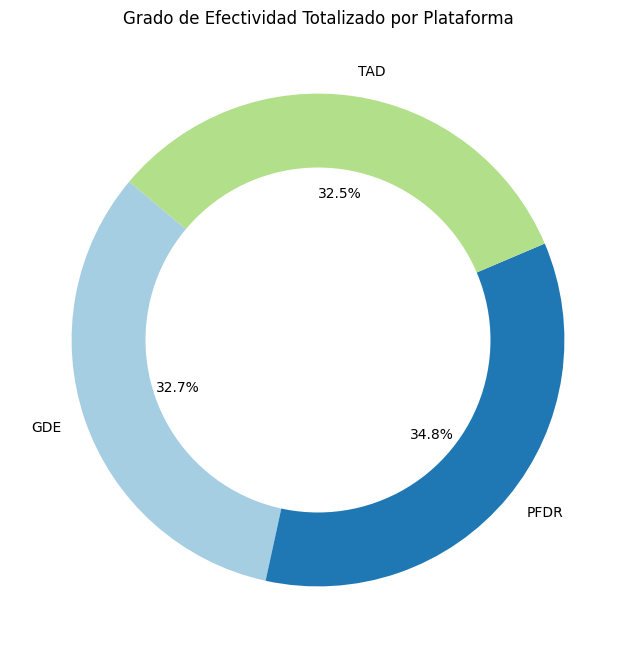

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que 'efectividad_totalizada_por_plataforma' contiene los datos que calculaste anteriormente

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(efectividad_totalizada_por_plataforma['efectividad'], labels=efectividad_totalizada_por_plataforma['plataforma'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Añadir un círculo en el centro para que parezca un donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Grado de Efectividad Totalizado por Plataforma')

# Mostrar el gráfico
plt.show()



quiero conocer la cantidad máxima de consultas recibidas, a que mes fecha corresponder y a que plataforma, así como el registro minimo



In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con las columnas mencionadas

# Asegúrate de tener la columna 'fecha' en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Encontrar el registro con la cantidad máxima de consultas recibidas
maximo_registro = df.loc[df['consultas_recibidas'].idxmax()]

# Encontrar el registro con la cantidad mínima de consultas recibidas
minimo_registro = df.loc[df['consultas_recibidas'].idxmin()]

# Mostrar los resultados
print("Registro con la cantidad máxima de consultas recibidas:")
print(maximo_registro)

print("\nRegistro con la cantidad mínima de consultas recibidas:")
print(minimo_registro)


Registro con la cantidad máxima de consultas recibidas:
fecha                     1970-01-01 00:00:00.000004062
plataforma                                          TAD
consultas_recibidas                                4062
consultas_respondidas                              4910
efectividad_respuestas                         1.208764
efectividad                                    1.208764
año                                                1970
Name: 57, dtype: object

Registro con la cantidad mínima de consultas recibidas:
fecha                     1970-01-01 00:00:00.000000155
plataforma                                         PFDR
consultas_recibidas                                 155
consultas_respondidas                               101
efectividad_respuestas                         0.651613
efectividad                                    0.651613
año                                                1970
Name: 2, dtype: object




también quisiera saber cual es la media de consultas recibidad y consultas respondidas por cada plataforma

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con las columnas mencionadas

# Calcular la media de consultas recibidas y respondidas por plataforma
media_por_plataforma = df.groupby('plataforma')[['consultas_recibidas', 'consultas_respondidas']].mean().reset_index()

# Mostrar el resultado
print(media_por_plataforma)


  plataforma  consultas_recibidas  consultas_respondidas
0        GDE              1567.55                 1518.2
1       PFDR               460.80                  486.0
2        TAD              2343.80                 2265.7


Me interesaría saber cuales son los 5 meses (o fechas) más demandantes y a que plataforma perternecen

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con las columnas mencionadas

# Asegúrate de tener la columna 'fecha' en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Ordenar el DataFrame por consultas recibidas en orden descendente
df_ordenado = df.sort_values(by='consultas_recibidas', ascending=False)

# Seleccionar los primeros 5 registros
top5_demandantes = df_ordenado.head(5)

# Mostrar el resultado
print("Los 5 meses más demandantes y sus plataformas:")
print(top5_demandantes[['fecha', 'plataforma', 'consultas_recibidas']])


Los 5 meses más demandantes y sus plataformas:
                           fecha plataforma  consultas_recibidas
57 1970-01-01 00:00:00.000004062        TAD                 4062
54 1970-01-01 00:00:00.000002967        TAD                 2967
6  1970-01-01 00:00:00.000002960        TAD                 2960
18 1970-01-01 00:00:00.000002734        TAD                 2734
51 1970-01-01 00:00:00.000002696        TAD                 2696


In [ ]:
top5_por_plataforma = df.groupby('plataforma').apply(lambda x: x.sort_values(by='consultas_recibidas', ascending=False).head(5)).reset_index(drop=True)

print("Los 5 meses más demandantes por plataforma:")
print(top5_por_plataforma[['fecha', 'plataforma', 'consultas_recibidas']])


Los 5 meses más demandantes por plataforma:
                           fecha plataforma  consultas_recibidas
0  1970-01-01 00:00:00.000002286        GDE                 2286
1  1970-01-01 00:00:00.000002205        GDE                 2205
2  1970-01-01 00:00:00.000001961        GDE                 1961
3  1970-01-01 00:00:00.000001845        GDE                 1845
4  1970-01-01 00:00:00.000001787        GDE                 1787
5  1970-01-01 00:00:00.000000788       PFDR                  788
6  1970-01-01 00:00:00.000000765       PFDR                  765
7  1970-01-01 00:00:00.000000707       PFDR                  707
8  1970-01-01 00:00:00.000000617       PFDR                  617
9  1970-01-01 00:00:00.000000607       PFDR                  607
10 1970-01-01 00:00:00.000004062        TAD                 4062
11 1970-01-01 00:00:00.000002967        TAD                 2967
12 1970-01-01 00:00:00.000002960        TAD                 2960
13 1970-01-01 00:00:00.000002734        TAD   


por ultimo quisiera saber la cantidad total de consultas recibidas por cada plataforma y verlos graficados en un grafico de barras

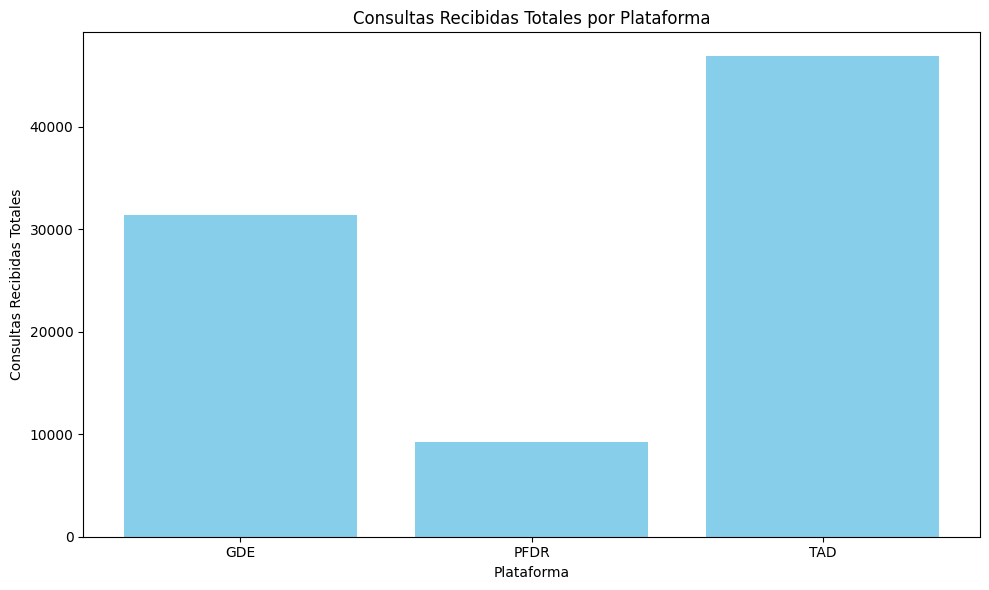

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con las columnas mencionadas

# Calcular la cantidad total de consultas recibidas por cada plataforma
total_consultas_por_plataforma = df.groupby('plataforma')['consultas_recibidas'].sum().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_consultas_por_plataforma['plataforma'], total_consultas_por_plataforma['consultas_recibidas'], color='skyblue')
plt.xlabel('Plataforma')
plt.ylabel('Consultas Recibidas Totales')
plt.title('Consultas Recibidas Totales por Plataforma')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Supongamos que ya calculaste total_consultas_por_plataforma como se mencionó antes

# Mostrar la tabla de totales por plataforma
print(total_consultas_por_plataforma)


  plataforma  consultas_recibidas
0        GDE                31351
1       PFDR                 9216
2        TAD                46876
